In [ ]:
'''
Resources:
Before doing the assignments watch the vedios by:
https://www.youtube.com/playlist?list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1 {Josh Strammer -  statquest}
and
https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi {3blue1brown}

Resources: [Book] + [Vedios]
https://www.youtube.com/watch?v=Wo5dMEP_BbI&list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3 {sentdex1}

'''

'\n\nResources:\nBefore doing the assignments watch the vedios by:\n'

In [ ]:
pip install tensor-sensor
# pip install torch # not needed here

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensor_sensor import Tsensor
# install torch in the environment (in the terminal)
# import torch


In [ ]:
# define Constants:
alpha = 0.0004 # for now
x = np.linspace(-10,10,100) #(1000 data points, in the range)
_x_ = x #temp x


In [ ]:
# a class to cleanly hold the basic functions.
class activate:
    def __init__(self,x):
        self.x = x

    # simple sigmoid function
    def sigmoid(self,x):
        return (1/(1+np.exp(-x)))

    # RELU
    # The ReLU (Rectified Linear Unit) activation function is a mathematical function that returns the input if it is positive, and zero otherwise, providing a piecewise linear output. (solves the issue of dead pixels that we usally get in the )
    def relu(self, x):
        return np.maximum(0,x)
    #Relu vs sigmoid:
    # https://medium.com/@chhayankshekhar/relu-vs-sigmoid-a-comprehensive-comparison-d8efe3f4ec04#:~:text=Sigmoid%20activations%20tend%20to%20saturate.%20When%20inputs%20are,ReLU%E2%80%99s%20resilience%20to%20saturation%2C%20leading%20to%20better%20learning.
    # https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484

    def leaky_relu(self,x):
        # solves the problem of diminishing weights in Relu (due to the weight being assigned as azero  suually when the number of hidden layers increase to a large extent.)
        return np.maximum(alpha*x,x) # here alpha is a hyperparameter (later do gridsearch meaybe)

    def Tanh(self,x):
        return np.tanh(x) # a step wise function (sigmoid is better than this.) (Zero centric)

    def softmax(self,x):
        # Sigmoid is used for binary classification methods where we only have 2 classes, while SoftMax applies to multiclass problems.
        # https://towardsdatascience.com/sigmoid-and-softmax-functions-in-5-minutes-f516c80ea1f9#:~:text=But%20if%20both%20functions%20map%20the%20same%20transformation,function%20is%20an%20extension%20of%20the%20Sigmoid%20function.
        scores = np.exp(x)
        return scores/np.sum(scores)


In [ ]:
# prediction_function
pred = lambda x, w1 =0.2, b = 1.99 : x*w1+b # (doing for simple and linear data will use linspace to create data )

# to see the possible spread and data mapping we will use a plotting function
def plot_prc_spread(x,y,title):
    plt.plot(x,y)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()


In [ ]:
class layers:

    def __init__(self, x):
        self.x = x

    def layer1_1(self):
        return(np.maximum(0, pred(self.x)))
    #adding another layer
    def layer1_2(self):
        return (np.maximum(0, pred(self.x, 0.3, -1.54)))

    def layer1_3(self):
        return (np.maximum(0, pred(self.x, 0.6, -1.54)))

    def layer1_4(self):
        return (np.maximum(0, pred(self.x, 0.8, -1.54)))


In [ ]:
#create instance of the classes
layers = layers(x)
activate = activate(x)

In [ ]:
# store the output / predictions
y1 = layers.layer1_1()
y2 = layers.layer1_2()
y3 = layers.layer1_3()
y4 = layers.layer1_4()
y_combined = y1 + y2 + y3 + y4


In [ ]:
# check if the sizes conorm else tranpose teh vector.
print(x.dtype, y4.dtype)
print(x.shape, y1.shape)

float64 float64
(100,) (100,)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

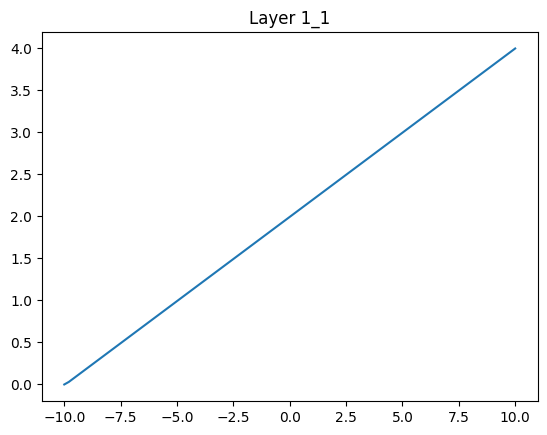

In [ ]:
# Plot to see the actual spread of the activations  (here using relu)
plot_prc_spread(x, y1, title='Layer 1_1')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

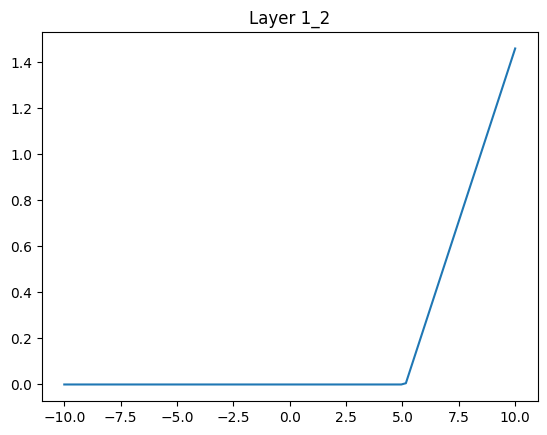

In [ ]:
plot_prc_spread(x, y2, title='Layer 1_2')


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

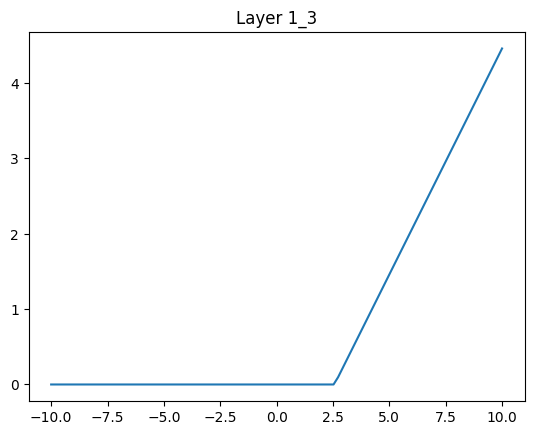

In [ ]:
plot_prc_spread(x, y3, title='Layer 1_3')


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

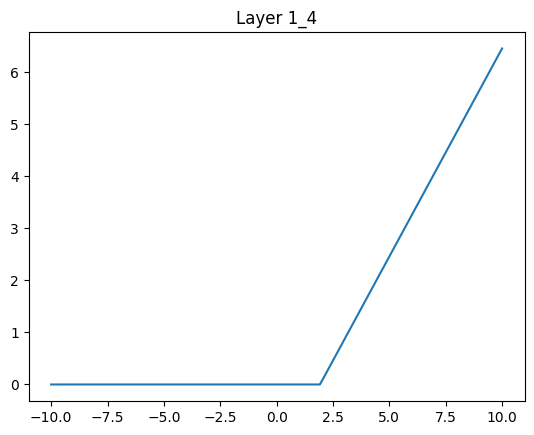

In [ ]:
plot_prc_spread(x, y4, title='Layer 1_4')


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

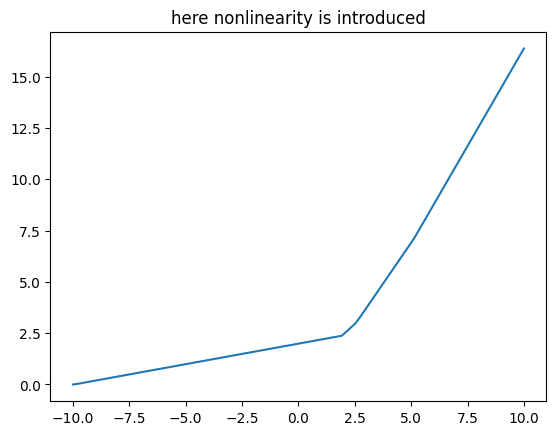

In [ ]:
plot_prc_spread(x,y_combined, title= 'here nonlinearity is introduced')

In [ ]:
help(tensor_sensor)

NameError: name 'tensor_sensor' is not defined

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:00
  Created wheel for tensor-sensor: filename=tensor_sensor-1.0-py3-none-any.whl size=26894 sha256=adecde64fea21a283b5f24e38eded951850e0077da582dcd9f19b5596c9278ed
  Stored in directory: /root/.cache/pip/wheels/cc/56/c8/0c0e7d4ea1b23ae2935bb71ab39b4c1af9f71d4287f6566ecd
Successfully built tensor-sensor
